
# Classifying the Stars as Giants or Dwarves

#  Support Vector Machine

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Handling

### Importing the Dataset

In [ ]:
dataset = pd.read_csv('star.csv')


FileNotFoundError: ignored

In [ ]:
dataset.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


### Preprcossing the Data

In [ ]:
# Removing the String Column and convert to the numerical form
dataset['SpType'].value_counts() #Check the Spectral Types

K0III          293
K1III          200
K2III          156
G8III          135
F5V            125
              ... 
B9.5IV           1
B0Ibp            1
M0V              1
B1Vv SB          1
M0/M1IIICNp      1
Name: SpType, Length: 584, dtype: int64

In [ ]:
def codes_modif(columnname, dataset):
    value_counts = dataset[columnname].value_counts()
    replacers = {value: index for index, value in enumerate(value_counts.index)}
    dataset[columnname] = dataset[columnname].map(replacers)
    return dataset

dataset = codes_modif("SpType", dataset)

In [ ]:
dataset.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,14,16.678352,0
1,8.70,2.31,1.29,-0.045,163,15.518060,0
2,5.77,5.50,1.03,0.855,34,14.471813,0
3,6.72,5.26,0.74,-0.015,111,15.324928,1
4,8.76,13.44,1.16,0.584,13,19.401997,1


In [ ]:
dataset['SpType'].value_counts()

0      293
1      200
2      156
3      135
4      125
      ... 
579      1
580      1
581      1
582      1
583      1
Name: SpType, Length: 584, dtype: int64

In [ ]:
X = dataset.iloc[:, :-1].values # Defining the X division
y = dataset.iloc[:, -1].values #Defining the y division, which is the result column

## Splitting into Training and Testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)

In [ ]:
print(X_train)

[[ 6.2500000e+00  2.4500000e+00  6.9000000e-01 -4.2000000e-02
   4.4100000e+02  1.3195830e+01]
 [ 4.8900000e+00  5.2940000e+01  7.7000000e-01  4.8700000e-01
   4.0000000e+00  1.8508919e+01]
 [ 6.9700000e+00  2.3300000e+00  5.4000000e-01  1.6280000e+00
   2.2000000e+01  1.3806780e+01]
 ...
 [ 9.1900000e+00  7.2200000e+00  1.2700000e+00  5.9600000e-01
   9.0000000e+00  1.8482685e+01]
 [ 9.0900000e+00  2.7000000e+00  1.9500000e+00  9.0000000e-01
   0.0000000e+00  1.6246819e+01]
 [ 7.7900000e+00  8.2000000e-01  9.4000000e-01  8.8300000e-01
   3.7200000e+02  1.2359069e+01]]


In [ ]:
print(y_train)

[0 1 0 ... 1 0 0]


In [ ]:
print(X_test)

[[  9.02        2.37        1.23        0.958       3.         15.893742 ]
 [  9.26       12.39        1.45        0.589      21.         19.725357 ]
 [  6.41        2.17        0.63        0.998     261.         13.0922985]
 ...
 [  8.         36.16        1.          0.78       52.         20.791142 ]
 [  8.02        4.4         0.86        0.97      132.         16.237263 ]
 [  6.32       26.59        0.85        0.517       8.         18.443592 ]]


In [ ]:
print(y_test)

[0 1 0 ... 1 0 1]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the SVM Model on the Training Set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Finding the accuracy

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
num=accuracy_score(y_test, y_pred)
num=num*100
print(num,"%")

89.34651290499725 %


In [ ]:
ans=classifier.predict(sc.transform([[5.99,13.73,0.58,1.318,14,16.678352]]))

if ans==0:
  print("The given Star is Dwarf Star")
else:
  print("The given Star is Giant Star")

The given Star is Dwarf Star


# Logistic Regression




In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(random_state = 0)
classifier_log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier_log.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
num=accuracy_score(y_test, y_pred)
num=num*100
print(num,"%")

89.40142778693026 %


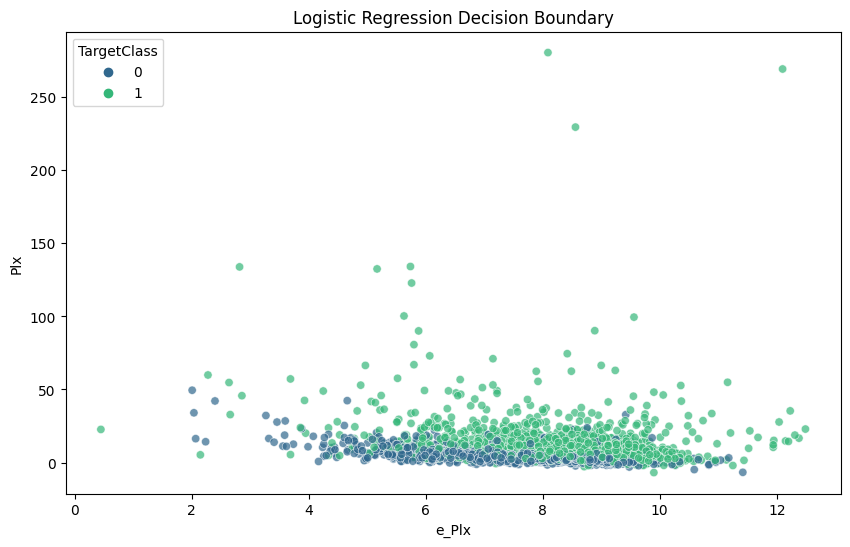

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vmag', y='Plx', hue='TargetClass', data=dataset, palette='viridis', alpha=0.7)
plt.xlabel('e_Plx')
plt.ylabel('Plx')
plt.title('Logistic Regression Decision Boundary')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
